In [2]:
import numpy as np
import torch
import torchsummary
from PIL import Image
from matplotlib import pyplot as plt
from skimage.data import astronaut
from torch import nn
from torch.nn import functional as F
from torchvision import transforms


### Tensor basics

tensor([[-0.5705,  1.7108,  0.9047],
        [ 0.1507, -0.8340,  2.4312],
        [-0.9134,  2.6104,  2.3506]])

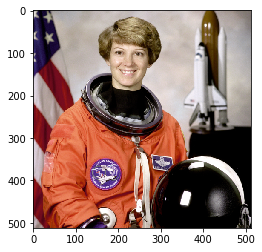

In [3]:
T = torch.from_numpy(np.array([1,2,3,4])).float()
T.exp_() # inplace operations end with _

# T.cuda() # moves data to GPU memory
numpy_Tensor = T.cpu().numpy() # create a numpy array out of torch.Tensor 

T.to('cpu')
# T.to('cuda')

im = astronaut()
plt.imshow(im)
torch.from_numpy(im)


# dot product (matrix multiplication)
x = torch.randn((3,2))
y = torch.randn((2,3))
x.mm(y)

### Numpy vs pytorch

##### Array creation

Numpy                 | PyTorch                | Notes
----------------------|------------------------|----------
`np.empty((2, 2))`    | `torch.empty(5, 3)`    | empty array
`np.random.rand(3,2)` | `torch.rand(5, 3)`     | random 
`np.zeros((5,3))`     | `torch.zeros(5, 3)`    | zeros
`np.array([5.3, 3])`  |`torch.tensor([5.3, 3])`| from list
`np.random.randn(*a.shape)`|`torch.randn_like(a)`| 
`np.arange(16)`       | `torch.range(0,15)` | array starting <br>from 0 ending at <br>15 (inclusive)


##### Math operations

Numpy                 | PyTorch                | Notes
----------------------|------------------------|----------
`x+y`                 | `x+y` <br> `y.add_(x)` <br> `torch.add(x,y)`| addition
`np.dot(x,y)` <br> `np.matmul(x,y)`| `torch.mm(x,y)` <br> `x.mm(y)` | matrix multiplication
`x*y`                 | `x*y`                  | element-wise multiplication
`np.max(x)`           | `torch.max(x)`         | 
`np.argmax(x)`        | `torch.argmax(x)`      |
`x**2` | `x**2` | Element-wise powers

##### Array manipulations

Numpy                 | PyTorch                | Notes
----------------------|------------------------|----------
`x.T` <br> `np.transpose(x)`| `torch.transpose(x, 0, 1)` <br> `torch.transpose(x, 1, 0)`     | transpose
`a = a.reshape(-1, 2)` | `a = a.view(-1,2)` | reshape array to <br> have two columns and <br> however as many rows
`np.concatenate([a, b])` | `torch.cat([a,b])` | concatenate list of <br> arrays/tensors


### Autograd

In [3]:
# Create tensors.
x = torch.tensor(10., requires_grad=True)

# Create the computetional graph

res = x ** 2

# propagate the gradients
res.backward()

# Print out the gradients.
print("The derivative of x ** 2 is 2x")
print("result:", float(x.grad))
print(x.grad)
print(x)
print(res)


dir(res)

The derivative of x ** 2 is 2x
result: 20.0
tensor(20.)
tensor(10., requires_grad=True)
tensor(100., grad_fn=<PowBackward0>)


['__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__idiv__',
 '__ilshift__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__long__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pow__',
 '__radd__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rfloordiv__',
 '__rmul__',
 '__rpow__',
 '__rshift__',
 '__rsub__',
 '__rtruediv__',
 '__setattr__',
 '__setitem_

In [4]:
x = torch.tensor(10., requires_grad=True)
res = torch.sin(x)
res.backward()

# Print out the gradients.
print("The derivative of sin(x) is cos(x)")
print("result:", float(x.grad))
print(x.grad)
assert x.grad == torch.cos(x)

The derivative of sin(x) is cos(x)
result: -0.83907151222229
tensor(-0.8391)


In [5]:
x = torch.tensor(10., requires_grad=True)
res = (5 * x - 2) ** 3 # d/dx = >15 * (5 * x -2) ** 2
res.backward()

print(x.grad)
print(15*(5*x-2) ** 2)

tensor(34560.)
tensor(34560., grad_fn=<MulBackward0>)


# Loss Functions

Naturally pytorch comes with most of the common loss functions implemented

In [6]:
preds = torch.Tensor([[0.2, 0.8],[0.9, 0.1]]).float()
target = torch.Tensor([0, 1]).long()

print("Cross Entropy:")
print(F.cross_entropy(preds, target))

Cross Entropy:
tensor(1.1043)


In [7]:
preds = torch.Tensor([[1],[2],[0.9]])
target = torch.Tensor([[1.3], [2.4], [0.9]])

print("MSE:")
print(F.mse_loss(preds, target))
print(nn.MSELoss()(preds, target))


MSE:
tensor(0.0833)
tensor(0.0833)


### Disable gradient computation with no_grad context manager (useful during inference)

In [8]:
with torch.no_grad():
    t = torch.tensor([1,2,3]).float()
    t = t ** 2
    print(t)
    print(t.grad)

tensor([1., 4., 9.])
None


### get the available computational device CUDA if availble otherwise CPU


In [9]:
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
print(DEVICE)

cuda


### Use the view function to get a new tensor with a different shape  but without touching the memory


In [10]:
t1 = torch.randn(1,5)
t1.view(5,1)

t1.squeeze(0) # remove first dimension
t1.unsqueeze(0) # expand by adding the first dimension
t1.unsqueeze(0).shape

torch.Size([1, 1, 5])

### Defining models
![alt text](https://i.stack.imgur.com/2MVdW.png "Title")


In [11]:
class Perceptron(nn.Module):
    def __init__(self, n_in, n_out):
        super(Perceptron, self).__init__()
        self.fc = nn.Linear(n_in, n_out, bias=True)

    def forward(self, x):
        return F.relu(self.fc(x))
    
    
    

perceptron = torch.nn.Sequential(nn.Linear(1000, 1000))
p = Perceptron(2, 1)
torchsummary.summary(p.to(DEVICE), input_size=(10,1000,2))
# list(p.named_parameters())

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1          [-1, 10, 1000, 1]               3
Total params: 3
Trainable params: 3
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.08
Forward/backward pass size (MB): 0.08
Params size (MB): 0.00
Estimated Total Size (MB): 0.15
----------------------------------------------------------------


###  expore the module API

In [12]:
for method in dir(p):
    if not method.startswith('_'): print(method)

add_module
apply
buffers
children
cpu
cuda
double
dump_patches
eval
extra_repr
fc
float
forward
half
load_state_dict
modules
named_buffers
named_children
named_modules
named_parameters
parameters
register_backward_hook
register_buffer
register_forward_hook
register_forward_pre_hook
register_parameter
share_memory
state_dict
to
train
training
type
zero_grad


### Custom model weights

In [13]:
# def custom_weights(m):
#     if type(m) == nn.Linear:
#         torch.nn.init.xavier_uniform_(m.weight)
#         m.bias.data.fill_(0.01)
        
# p.apply(custom_weights)

linear_layer = nn.Linear(10,10)

linear_layer.cuda()

Linear(in_features=10, out_features=10, bias=True)

### Model persistance and loading

In [14]:
p = Perceptron(2, 2)
torch.save(p.state_dict(), 'model.torch')
p.load_state_dict(torch.load('model.torch'))
print(p.state_dict())

OrderedDict([('fc.weight', tensor([[-0.2544, -0.4592],
        [ 0.3236, -0.6317]])), ('fc.bias', tensor([ 0.6965, -0.2303]))])


### Parameters

In [15]:
for params in p.parameters():
    print(params)

Parameter containing:
tensor([[-0.2544, -0.4592],
        [ 0.3236, -0.6317]], requires_grad=True)
Parameter containing:
tensor([ 0.6965, -0.2303], requires_grad=True)


### Activation functions

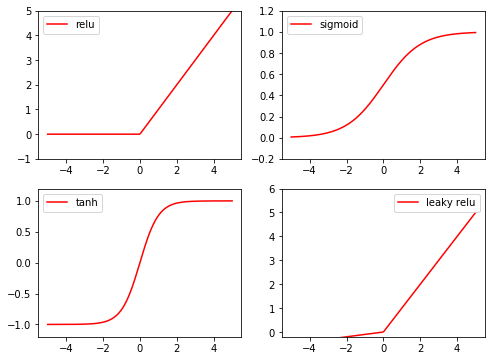

In [18]:

# fake data
x = torch.linspace(-5, 5, 200)  # x data (tensor), shape=(100, 1)
x_np = x.data.numpy()   # numpy array for plotting

# following are popular activation functions
y_relu = torch.relu(x).data.numpy()
y_sigmoid = torch.sigmoid(x).data.numpy()
y_tanh = torch.tanh(x).data.numpy()
y_softplus = F.leaky_relu(x, negative_slope=0.1).data.numpy() # there's no softplus in torch
# y_softmax = torch.softmax(x, dim=0).data.numpy() softmax is a special kind of activation function, it is about probability

# plt to visualize these activation function
plt.figure(1, figsize=(8, 6))
plt.subplot(221)
plt.plot(x_np, y_relu, c='red', label='relu')
plt.ylim((-1, 5))
plt.legend(loc='best')

plt.subplot(222)
plt.plot(x_np, y_sigmoid, c='red', label='sigmoid')
plt.ylim((-0.2, 1.2))
plt.legend(loc='best')

plt.subplot(223)
plt.plot(x_np, y_tanh, c='red', label='tanh')
plt.ylim((-1.2, 1.2))
plt.legend(loc='best')

plt.subplot(224)
plt.plot(x_np, y_softplus, c='red', label='leaky relu')
plt.ylim((-0.2, 6))
plt.legend(loc='best')

plt.show()

### Modularity

In [22]:
def conv_bn_pool(inch, outch, kernel_size=3):
    return  nn.Sequential(
                nn.Conv2d(inch, outch, kernel_size=3, stride=1, padding=1),
                nn.BatchNorm2d(outch),
                nn.ReLU(),
                nn.MaxPool2d(kernel_size=2, stride=2))


class My_Model(nn.Module):
        

    def __init__(self, num_of_class):
        super(My_Model, self).__init__()
        
        self.layer1 = conv_bn_pool(1, 16)
        self.layer2 = conv_bn_pool(16, 32)
        self.fc = nn.Linear(7 * 7 * 32, num_of_class)
        self.mapxpool = nn.MaxPool2d(2)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out
    
net = My_Model(100)
torchsummary.summary(net.to(DEVICE), (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 28, 28]             160
       BatchNorm2d-2           [-1, 16, 28, 28]              32
              ReLU-3           [-1, 16, 28, 28]               0
         MaxPool2d-4           [-1, 16, 14, 14]               0
            Conv2d-5           [-1, 32, 14, 14]           4,640
       BatchNorm2d-6           [-1, 32, 14, 14]              64
              ReLU-7           [-1, 32, 14, 14]               0
         MaxPool2d-8             [-1, 32, 7, 7]               0
            Linear-9                  [-1, 100]         156,900
Total params: 161,796
Trainable params: 161,796
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.47
Params size (MB): 0.62
Estimated Total Size (MB): 1.09
-------------------------------------------

### Dealing with images

In [26]:
image = Image.fromarray(astronaut())
print(type(image))

<class 'PIL.Image.Image'>


### Using torchvision transformers

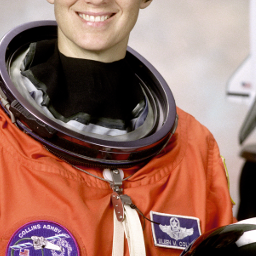

In [27]:
transforms.CenterCrop(256)(image)

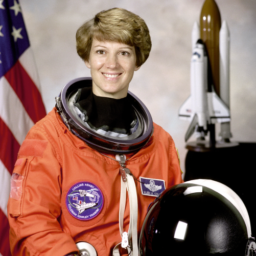

In [28]:
transforms.RandomResizedCrop(256)(image)

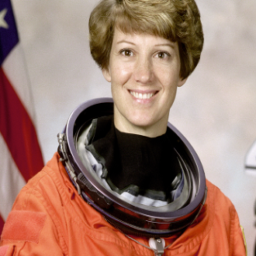

In [29]:
transforms.RandomResizedCrop(256)(image)

### 1 Generate a random  torch Tensor  with 32 filters  and with/height 64  pass it trough a 2d max_pool operation with kernel_size=2

In [ ]:
# YOUR CODE

### 2 Its a common operation to find the index where a tensor has the a max value. 
For instance given a tensor   [0.1, 0.5, 0.9] you would like to get the number 2. as 0.9 is the max value (remember python uses 0-indexing most of the time)

In [ ]:
# This could be a output tensor from a 10-class classification problem and a batch size od 32. 
# How do you find the index of the max value in each of the batches?
tensor = torch.randn((32, 10))
# YOUR CODE

### 3 Reshaping


In [ ]:
# Change X shape into (10, 3)
X = torch.ones(5, 6)

# YOUR CODE

# Remove all the dimensions of size 1 in X.

X = torch.randn(10, 10, 1, 1)

# YOUR CODE

### 4 Stacking

In [ ]:
# stack x, y, and z vertically.

x = torch.Tensor([1, 4])
y = torch.Tensor([2, 5])
z = torch.Tensor([3, 6])


# YOUR CODE

In [ ]:
### Counting 
# Get the indices of all nonzero elements in X.
X = torch.Tensor([[0,1,7,0,0],[3,0,0,2,19]])


# YOUR CODE

### 5 nn.Conv2D changes size of the outut vector

In [ ]:
# Why is the output of this cell a tensor with a shape 1,64,6,6 - what can we do to get the same input and output shape

v =torch.rand(1, 32, 8, 8)
print(nn.Conv2d(32, 64, 3)(v).shape)

# YOUR CODE

### 6 Calculate the  MSE Loss  for two vectors

In [30]:
# Given
y_true = np.array([0,1,2,3,4,5]).astype(float)
y_true = torch.tensor(y_true, requires_grad=True)
y_pred = y_true * 0.8

# YOUR CODE

### 7 Create a dummy example calculating cross_entropy loss on examples with more then 2 classes.

In [32]:
#YORE CODE

### 8 Create a Image transformer by Composing multiple opertions for instance CenterCrop and Rotation.

In [34]:
# YOUR CODE